In [ ]:
# Run once at top of notebook
!pip install --quiet kaggle pycocotools opencv-python pillow matplotlib tqdm


In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramyapantham","key":"9849f190eec60a3b0c541a67678949f9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Step 2: Download COCO 2017 dataset
!wget -nc http://images.cocodataset.org/zips/train2017.zip
!wget -nc http://images.cocodataset.org/zips/val2017.zip
!wget -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2025-10-25 15:17:53--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.35.113, 16.15.178.168, 3.5.13.143, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.35.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  96.5MB/s    in 3m 13s  

2025-10-25 15:21:06 (95.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2025-10-25 15:21:06--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.200.49, 52.216.216.201, 3.5.29.23, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.200.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80

In [ ]:
# Step 3: Unzip files
!unzip -q -n train2017.zip
!unzip -q -n val2017.zip
!unzip -q -n annotations_trainval2017.zip


In [ ]:
# Step 4: Imports for visualization
import os
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

In [ ]:
# Step 5: Load COCO annotations
annotation_file = 'annotations/instances_val2017.json'
coco = COCO(annotation_file)


loading annotations into memory...
Done (t=0.63s)
creating index...
index created!


In [ ]:

# Step 6: Get image IDs
img_ids = coco.getImgIds()[:50]  # first 50 images


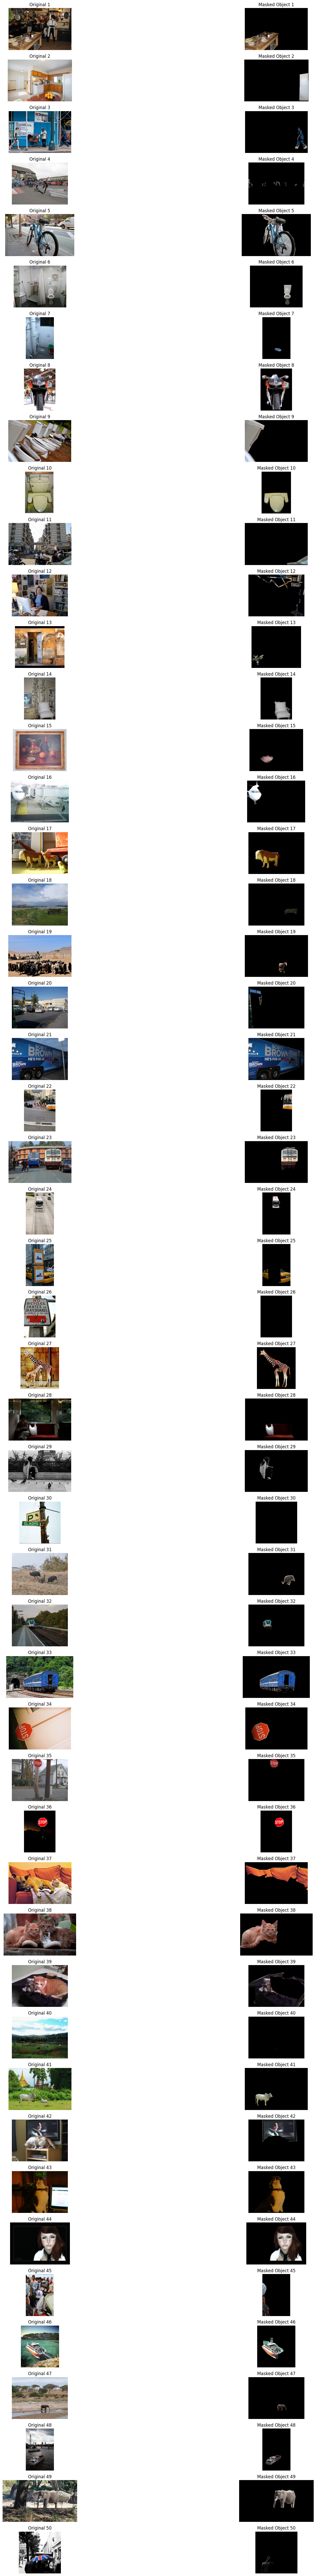

In [ ]:
plt.figure(figsize=(25, 100))

for i, img_id in enumerate(img_ids):
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join('val2017', img_info['file_name'])

    # Load image in RGB
    img = np.array(Image.open(img_path).convert('RGB'))

    # Load all object masks
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    # Find the largest object (main subject)
    largest_area = 0
    main_mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = coco.annToMask(ann)
        area = mask.sum()
        if area > largest_area:
            largest_area = area
            main_mask = mask

    # Apply mask: main object in color, background black
    masked_img = img * main_mask[:, :, np.newaxis]

    # Plot original image
    plt.subplot(50, 2, 2*i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Original {i+1}")

    # Plot masked image (main object in color)
    plt.subplot(50, 2, 2*i+2)
    plt.imshow(masked_img)
    plt.axis('off')
    plt.title(f"Masked Object {i+1}")

plt.tight_layout()
plt.show()



